In [1]:
import pandas as pd
import numpy as np 
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)



## Note 
- check for duplicates in the id numbers 
    - leave them alone for now even if there are 177 duplicates flucuatio in price might be due to other factors 

https://github.com/ironhack-edu/data_mid_bootcamp_project_regression

# how to drop rows 
- ~ is for the removal of the row 
    - cleandata = cleandata[~cleandata['bedrooms'].isin([33])] 
    - cleandata.shape 


- cleandaata = cleandata.drop_duplicates(subset=['bedrooms','bathrooms'])

In [61]:
# check out the 33 bedrooms , major outlier 
home[home['bedrooms']==33] 
# drop this row using the above code





,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


saturday after thnks giving weekend 
DECEMBER 4 deadline 
present on the 7th 

- Id: Unique identification number for the property.
- date: date the house was sold.
- price: price of the house.
- waterfront: house which has a view to a waterfront.
- condition: How good the condition is (overall). 1 indicates worn out property and 5 excellent.
- grade: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
- Sqft_above: square footage of house apart from basement.
- Sqft_living15: Living room area in 2015(implies - some renovations). This might or might not have affected the lotsize area.
- Sqft_lot15: lotSize area in 2015(implies - some renovations).

HOME:looking at property  
dont have to do the sql questions during the presention 
explain your approach 
explain what you did to improve the accuracy of the model  


In [2]:
home = pd.read_excel('regression_data.xls')
home.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [3]:
home.shape

(21597, 21)

# check for duplicated id numbers 
- drop the ones you dont think are neccessary 
- check to see if its because of renovations that their is a duplicated id, also check lat and long  
- https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

In [4]:
home['id'].duplicated().sum()

177

In [5]:
home.loc[home['id'].duplicated(),:]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
94,6021501535,2014-12-23,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
314,4139480200,2014-12-09,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
325,7520000520,2015-03-11,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,240500
346,3969300030,2014-12-29,4,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138,239900
372,2231500030,2015-03-24,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929,530000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2015-02-19,4,3.50,2910,5260,2.0,0,0,3,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260,645000
20597,2724049222,2014-12-01,2,2.50,1000,1092,2.0,0,0,3,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466,220000
20654,8564860270,2015-03-30,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,502000
20764,6300000226,2015-05-04,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,380000


In [6]:
# check to see if the ids that are duplicated are in fact the same 

home[home['id']==6021501535] 

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
93,6021501535,2014-07-25,3,1.5,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.687,-122.386,1570,4500,430000
94,6021501535,2014-12-23,3,1.5,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.687,-122.386,1570,4500,700000



home=home.drop_duplicates(subset = ['id'],keep ='last')  
# have to specify the subset or else it will take notice of any differnt column 


#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [7]:
home.shape

(21597, 21)

In [8]:
home = home.drop(['id'],axis=1)

In [9]:
rows= home.shape[0]
columns= home.shape[1] 
print('rows: ',rows)
print('columns: ',columns)


rows:  21597
columns:  20


# ??? 
- The dataset consists of information on ***22,000*** properties. The dataset consists of historic data of houses sold between May 2014 to May 2015. 
- rows:  ***21597*** ???

- Id: Unique identification number for the property
- date: the date the house was sold
- price: the price of the house
- waterfront: the house which has a view to a waterfront
- condition: How good the condition is (Overall). 1 indicates worn-out property and 5 excellent.
- grade: Overall grade given to the housing unit, based on the King County grading system. 1 poor, 13 excellent.
- Sqft_above: square footage of house apart from the basement
- Sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotSize area.
- Sqft_lot15: lotSize area in 2015(implies-- some renovations)


# questions  
- what months have the most houses sold 
- what price is most common 
- condition of properties sold most often 
- 

In [10]:
home.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [11]:
home.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [12]:
home.dtypes

date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [13]:
home.select_dtypes(np.number)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [14]:
home['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [15]:
home['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [16]:
home['floors'].value_counts() 
# space that you cant live in basment attic ?
# is that what the .5 is for ?

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [17]:
home['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [18]:
home[home['floors']==2.5] 
#check to see if places with this score have an attic or a basment 

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
484,2015-04-10,4,3.25,4860,181319,2.5,0,0,3,9,4860,0,1993,0,98074,47.6179,-122.005,3850,181319,1390000
518,2014-11-14,4,2.25,4760,8036,2.5,0,0,5,9,3390,1370,1916,0,98112,47.6415,-122.285,2950,9323,2250000
577,2014-12-11,4,4.00,6050,84942,2.5,0,2,3,9,4150,1900,2009,0,98077,47.7466,-122.029,2700,199504,930000
759,2014-10-24,5,1.50,2830,4000,2.5,0,0,4,8,2830,0,1918,0,98118,47.5132,-122.262,1480,4000,405600
815,2014-12-23,3,3.25,2660,17852,2.5,0,0,3,8,2660,0,2014,0,98010,47.3077,-122.011,1320,11876,379000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21245,2014-05-13,4,2.50,3520,6773,2.5,0,0,3,9,2650,870,2006,0,98136,47.5317,-122.391,2930,6458,870000
21264,2015-03-10,3,2.50,1900,1258,2.5,0,0,3,7,1700,200,2007,0,98119,47.6465,-122.358,1780,1877,645000
21329,2014-06-12,3,2.50,2570,3600,2.5,0,0,3,9,2570,0,2007,0,98027,47.5412,-121.994,2570,3600,680000
21441,2014-10-14,3,3.00,2330,1944,2.5,0,0,3,8,1950,380,2014,0,98027,47.5446,-122.016,2290,1407,669950


In [19]:
home['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [20]:
home['view'].unique()

array([0, 3, 4, 2, 1])

In [21]:
home['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [22]:
home['waterfront'].unique()

array([0, 1])

In [23]:
home['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [24]:
#note
#what should you categorize lat and log as anther obj?
# lat and long would be greate for tableau story map graph  
#should zip code also be included ?? 
# the column grade carries weight for each number so do not change it to categorical 

In [25]:
home['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [26]:
home['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
65          1
1248        1
172         1
1920        1
1135        1
Name: sqft_basement, Length: 306, dtype: int64

In [27]:
home['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [28]:
#home.select_dtypes(np.object) #none all of them are numercial, though the columns with ratings could be categorized differently 

In [29]:
home.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [30]:
col= list(home.columns)
col

['date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']

# HISTOGRAMS 
- check out the data in some histograms  
- REMEMBER 
    - that you can apply log or r^2
    -def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later
    - if you want the data to look closer to a normal curve  
- ***

In [ ]:
# apply chi2_contigency on the arrays you want ,scipy.stats.chisquare 
# HELP ask what the difference between these 2 is 

In [31]:
#make it so it prints a title 
def plot_hist(x): 
    print(x)
    home[x].hist()
    plt.show()

date


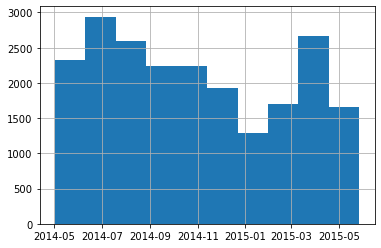

bedrooms


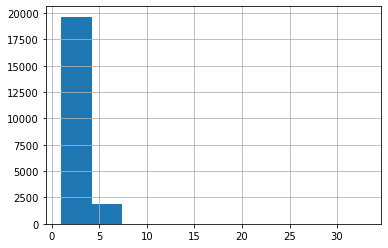

bathrooms


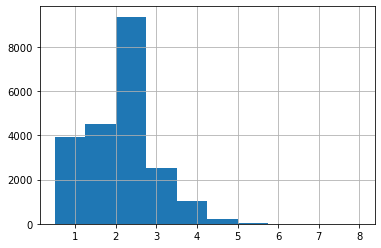

sqft_living


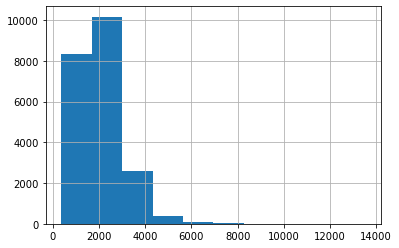

sqft_lot


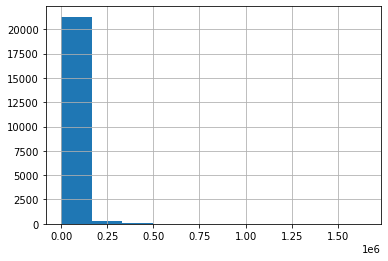

floors


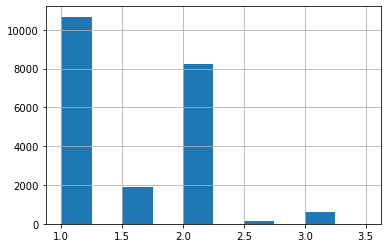

waterfront


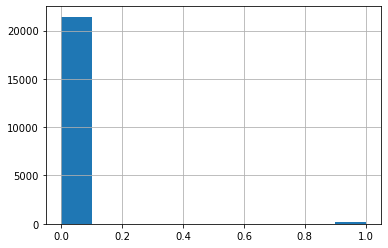

view


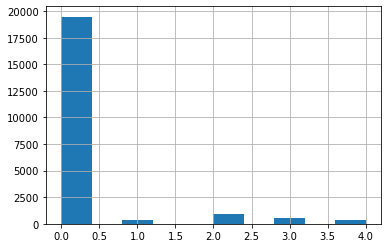

condition


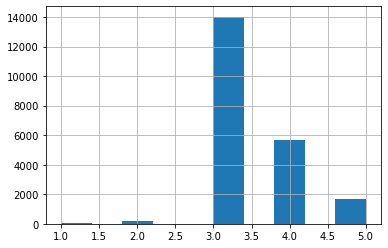

grade


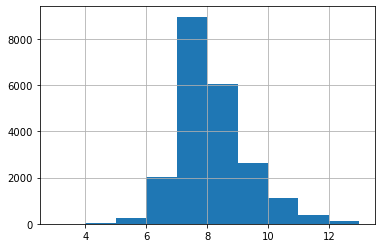

sqft_above


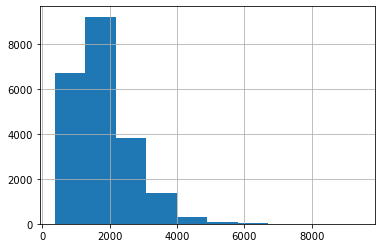

sqft_basement


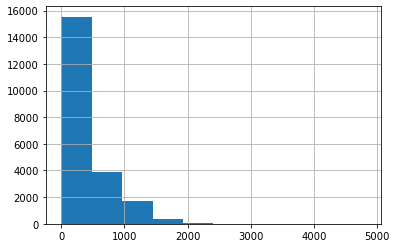

yr_built


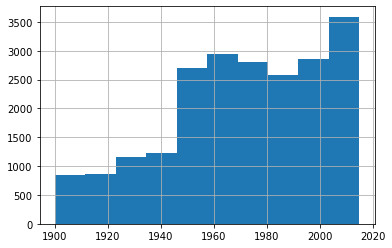

yr_renovated


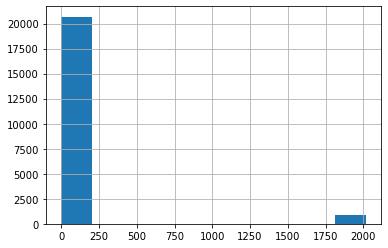

zipcode


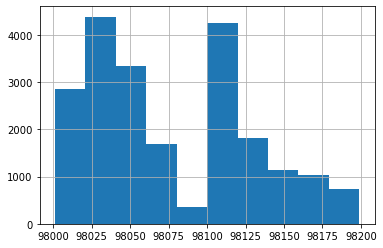

lat


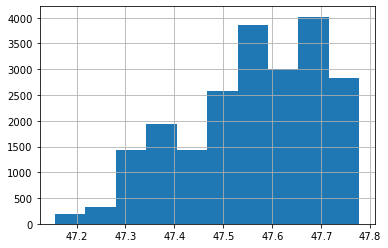

long


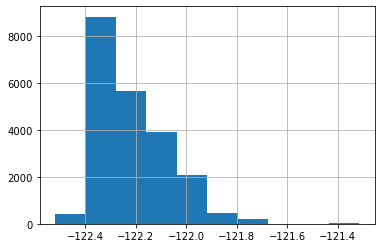

sqft_living15


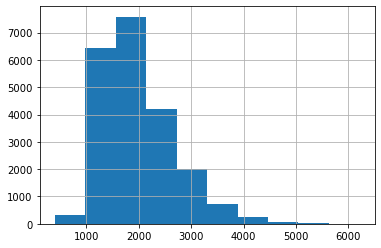

sqft_lot15


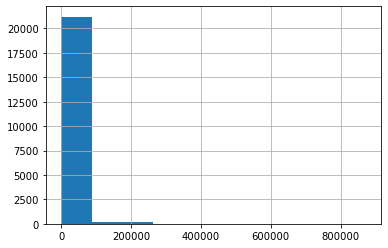

price


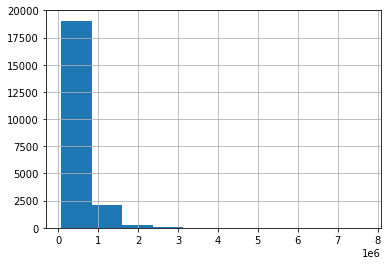

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [32]:
list(map(plot_hist,home.columns))
# grade,sqft_above,sqft_basement,long,sqft_living15
    # see if you can make them look closer to a normal distribution using r^2 or logs 

# BOXPLOTS
- clean out all the outliers exclude the columns with ratings use the example that if it has more than a ceratin number of values its a categorical   
- look at week 10 ]
- looks at lesson self guided 
    - make a map function for each individual column 


In [33]:
def plot_hist(x): 
    print(x)
    plt.boxplot(home[x])
    plt.show()

bedrooms


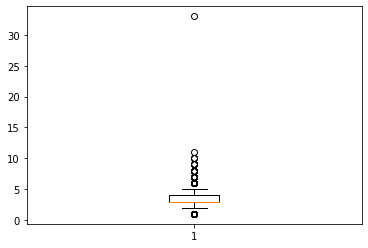

bathrooms


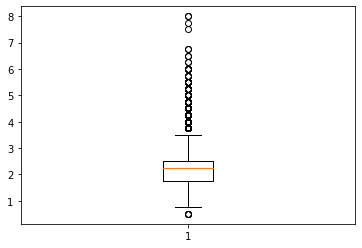

sqft_living


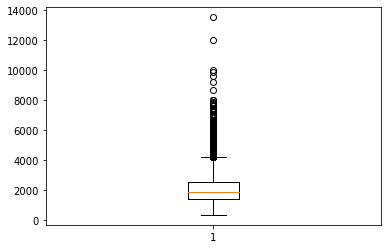

sqft_lot


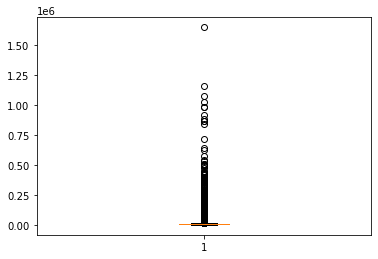

floors


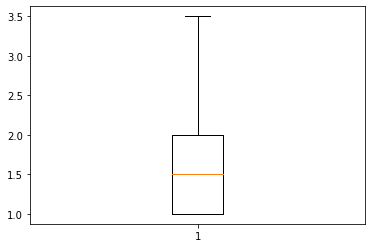

waterfront


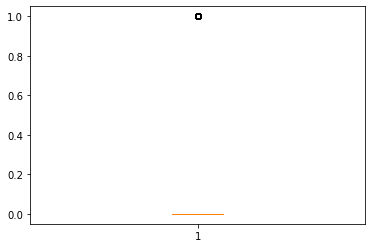

view


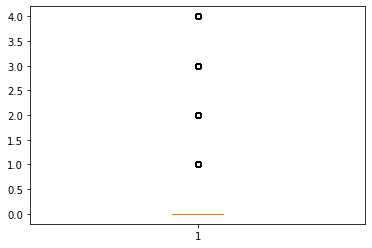

condition


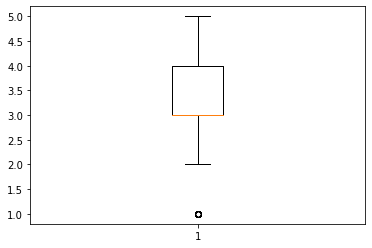

grade


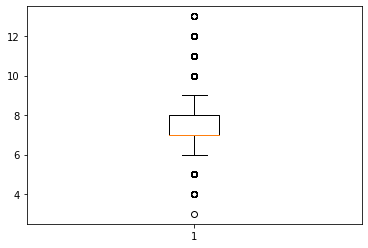

sqft_above


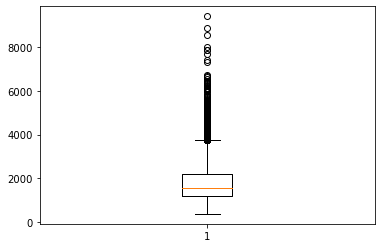

sqft_basement


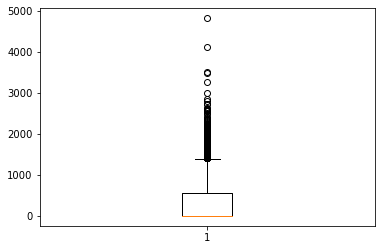

yr_built


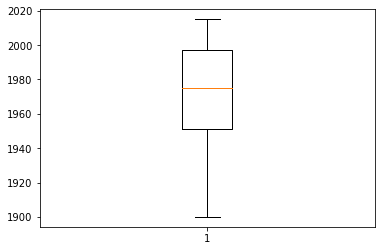

yr_renovated


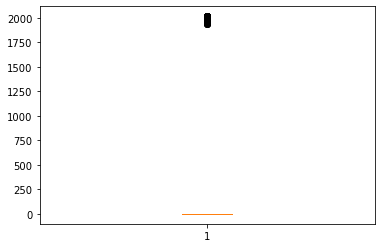

zipcode


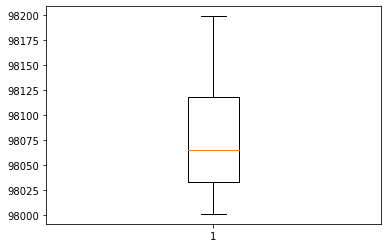

lat


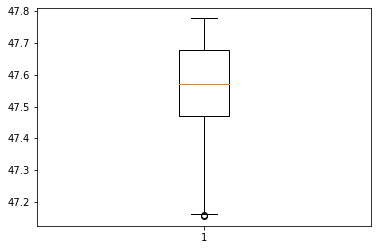

long


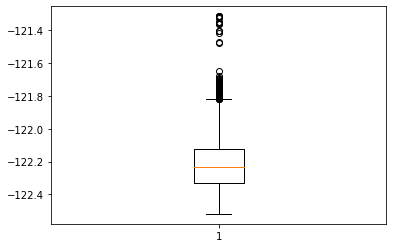

sqft_living15


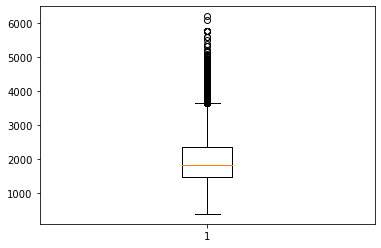

sqft_lot15


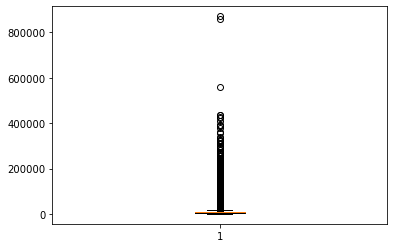

price


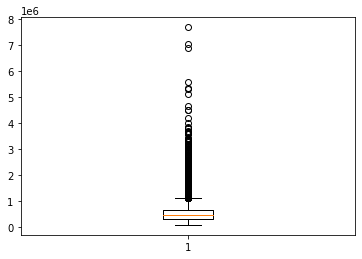

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [34]:
# probably best to do them individually then remove the outliers 
list(map(plot_hist,(home.select_dtypes(np.number).columns)))


In [35]:
home.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [36]:
home['bathrooms'].shape

(21597,)

In [37]:
home['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

bathrooms


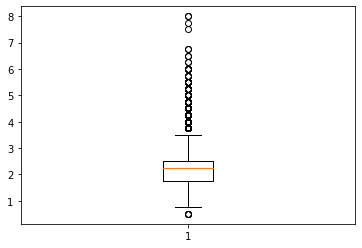

In [38]:
plot_hist('bathrooms')

In [ ]:
#note 
- for bathrooms it might be best just to apply a filter instead of using the iqr method 
- also practice changing the 1.5 to see how it changes what values are included 

In [39]:
iqr = np.percentile(home['bathrooms'],75)-np.percentile(home['bathrooms'],25) 
upper_limit = np.percentile(home['bathrooms'],75)+1.5*iqr
lower_limit = np.percentile(home['bathrooms'],25)-1.5*iqr
home = home[(home['bathrooms']<upper_limit) & (home['bathrooms']>lower_limit)] #storing a dataframe into a column 

#filtering on one column but you are storing the results in a datframe and not just a column 
# the left hand side should match the right hand side 

In [40]:
home['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
0.75      71
1.25       9
Name: bathrooms, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff49875c040>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff49875cee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff49875c430>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff4977e04c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4977e0310>],
 'means': []}

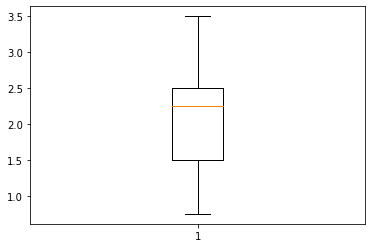

In [41]:
plt.boxplot(home['bathrooms'])

In [42]:
home['bathrooms'].boxplot() --- gives the error 'Series' object has no attribute 'boxplot'
#bathrooms = home['bathrooms']
#pd.bathrooms.plot.box() 


df= pd.DataFrame(home,columns='bathrooms')
ax=df.plot.box()


SyntaxError: invalid syntax (<ipython-input-42-5c1f1b726622>, line 1)

In [ ]:
---------------------------------------------------

price


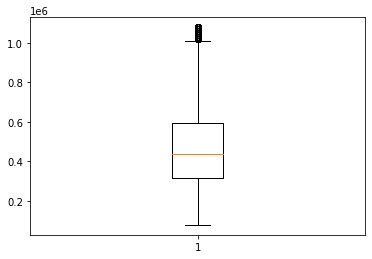

In [50]:
plot_hist('price')

In [51]:
iqr = np.percentile(home['price'],75)-np.percentile(home['price'],25) 
upper_limit = np.percentile(home['price'],75)+3*iqr
lower_limit = np.percentile(home['price'],25)-3*iqr
home = home[(home['price']<upper_limit) & (home['price']>lower_limit)]



In [52]:
home['price'].value_counts()

350000    171
450000    170
550000    156
500000    151
425000    150
         ... 
419354      1
579100      1
230950      1
185900      1
303100      1
Name: price, Length: 3401, dtype: int64

price


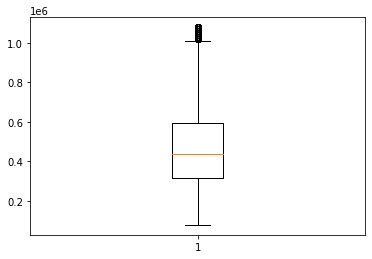

In [53]:
plot_hist('price')

In [ ]:
--------------------------------------------------------------------

In [ ]:
plot_hist('sqft_lot')

In [ ]:
iqr = np.percentile(home['sqft_lot'],75)-np.percentile(home['sqft_lot'],25) 
upper_limit = np.percentile(home['sqft_lot'],75)+1.5*iqr
lower_limit = np.percentile(home['sqft_lot'],25)-1.5*iqr
home = home[(home['sqft_lot']<upper_limit) & (home['sqft_lot']>lower_limit)]


In [ ]:
plot_hist('sqft_lot')

#loop them all individually 
#make a list of the individual upper and lower limits to make sure you dont lose to many data point 
 
- check Lab|Data_cleaning_and_wrangling_Saturday_nov_13 if you have any questions about usage

# Question resulted in a lot of nans  
- check saturday nov 13 notes for reference 
# help 
- def outliers_remove(df,col):
    iqr=np.percentile(df[col],75)-np.percentile(df[col],25)
    upper_limit = np.percentile(df[col],75)+1.5*iqr
    lower_limit = np.percentile(df[col],25)+1.5*iqr
    df[col]=df[(df[col]<upper_limit) & (df[col]>lower_limit)]
    return df 

In [ ]:
# try the way from last class where you make a list of the upper and lower limit of each column so you 
#dont lose as many points in the process 

def calculate_iqr(i):
    iqr = np.percentile(home[i],75)-np.percentile(home[i],25) 
    upper_limit = np.percentile(home[i],75)+1.5*iqr
    lower_limit = np.percentile(home[i],25)-1.5*iqr
    home[i]= home[(home[i]<upper_limit) & (home[i]>lower_limit)]
    return home


# scaling 

In [55]:
home_corr=home.corr() 

In [56]:
# refer back to lesson 4.03_thursday

X_num = home_corr.drop(['price'],axis = 1 ) 


In [57]:
# this applies to everything ???
#your options include normalizer or min max scaler 
# when using this standardscaler all the null values must be removed to have this function 
from sklearn.preprocessing import StandardScaler
transformer= StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
x_standardized

array([[ 2.92808715e+00,  5.14319441e-01,  6.67161914e-01,
        -4.22210504e-01, -1.17467332e-01, -4.43274012e-01,
        -4.46310032e-01,  1.56227106e-01,  1.32127726e-02,
         3.79875707e-01,  6.27689059e-01, -2.35101186e-02,
        -2.31696133e-01, -3.22651361e-01, -3.99008982e-01,
         1.69119617e-02,  2.08968062e-01, -4.45457619e-01],
       [ 9.41491038e-01,  2.17005756e+00,  1.03204517e+00,
        -2.95803468e-01,  1.04623796e+00, -3.42753025e-01,
        -2.24961233e-01, -4.77596842e-01,  9.17346433e-01,
         8.36852396e-01,  3.71700994e-01,  1.14266017e+00,
        -1.66969920e-01, -5.33864843e-01, -3.27013660e-01,
         3.82958713e-01,  6.83044122e-01, -3.10370170e-01],
       [ 1.35332529e+00,  1.23713162e+00,  1.92888054e+00,
         6.18872907e-02,  4.85470011e-01, -3.02052320e-01,
         1.01125201e-01, -2.22825895e-01,  1.17372438e+00,
         1.45173037e+00,  9.64839306e-01,  5.40933352e-01,
        -1.54543693e-01, -5.03508044e-01, -2.39784398e

# using min max scaler on numerical data types 
- check saturday nov 13 for reference 


In [ ]:
from sklearn.preprocessing import MinMaxScaler 
transformer = MinMaxScaler().fit(numerical)
x_min_max = transformer.transform(numerical)
x_min_max

# Scaling categorical data types (use on classification problem) 

- encoded_df= pd.get_dummies(categorical) 
    - remember to concatenate the numerical and categorical afterward 
        - categorical=home.select_dtypes(np.object) 
        - scaled_df = pd.DataFrame(x_standardized) 
        - X=pd.concat([scaled_df,encoded_df],axis=1)

# Train Test Split 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=100)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# CORRELATION MATRIX   
- question -> do you need to apply the standardscaler befor or after the corr matrix ???  
    - answer --> is you do it after the corr matix 
    
- filter out anything with a high colinearity 
- columns to drop 
    - id 
    - 

In [ ]:
correlation_matrix= numerical.corr() 
correlation_matrix

In [ ]:
home.columns

# note 
- does the date really matter ???

In [ ]:
home_corr = home[['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price']]
corr_matrix = home_corr.corr(method = 'pearson')
fig,ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(corr_matrix,annot=True)
plt.show()

In [ ]:
sns.regplot('sqft_living15','sqft_living', data = home_corr) 
# check syntax here 
    #https://seaborn.pydata.org/generated/seaborn.regplot.html


In [ ]:

sns.heatmap(correlation_matrix,annot=True)
plt.show() 
#filter out anything higher than 0.8?? 

In [ ]:
#create a better filter that provides a list of the columns you need to drop refer back to notes 8
high_colinearity = numerical.corr()>0.8
high_colinearity 


 #sqft above and living  
 #

In [ ]:
#want to predict the price of the house 